Data Science Portfolio Project by Dhanraj Kulkarni

Data Set - Life Expectancy and GDP - A data visualization project

Objectives - 

1. To visualize the increase/decrease in life expectancy and GDP across the years
2. To find out if there is a corelation between GDP and Life expectancy

In [148]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import scipy.stats as stats

df = pd.read_csv('all_data.csv')

print(df.head())
print(df.dtypes)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


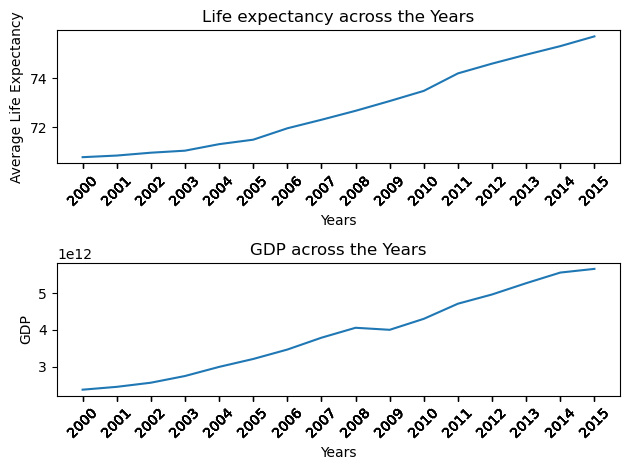

<Figure size 640x480 with 0 Axes>

In [149]:
#print(df.describe())

mean_age_by_year = df.groupby('Year')['Life expectancy at birth (years)'].mean()
mean_GDP_by_year = df.groupby('Year')['GDP'].mean()

#print(np.round(mean_age_by_year,2))
#print(mean_GDP_by_year)

ax1 = plt.subplot(211)

ax1.plot(mean_age_by_year)
plt.title('Life expectancy across the Years')
plt.xticks(df['Year'], rotation =45)
plt.xlabel('Years')
plt.ylabel('Average Life Expectancy')

ax2 = plt.subplot(212)

ax2.plot(mean_GDP_by_year)
plt.title('GDP across the Years')
plt.xticks(df['Year'], rotation =45)
plt.xlabel('Years')
plt.ylabel('GDP')

plt.tight_layout()
plt.show()
plt.clf()



Objective 1:

As observed above, we can confirm that the average Life expectancy and GDP have increased across the years across all the observed countries

The average life expectancy was 70.77 years in 2000 and it has increased to 75.72 in 2015 as per the observed data

The average GDP was 2.37 and in 2000 and it has increased to 5.65 in 2015

Now, lets observe the data country wise

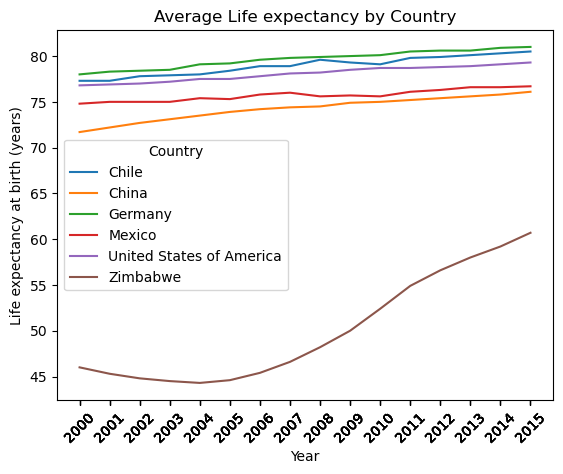

In [150]:
years_in_df = list(df['Year'].unique())

sns.lineplot(x='Year', y='Life expectancy at birth (years)',hue='Country',data=df)
plt.title("Average Life expectancy by Country")
plt.xticks(df['Year'], rotation=45)
plt.show()

Zimbabwe has the lowest life expectancy, with Germany showcasing the highest mean Life expectancy

To understand if GDP and Life expectancy has a correlation, let us also look at he GDP countrywise

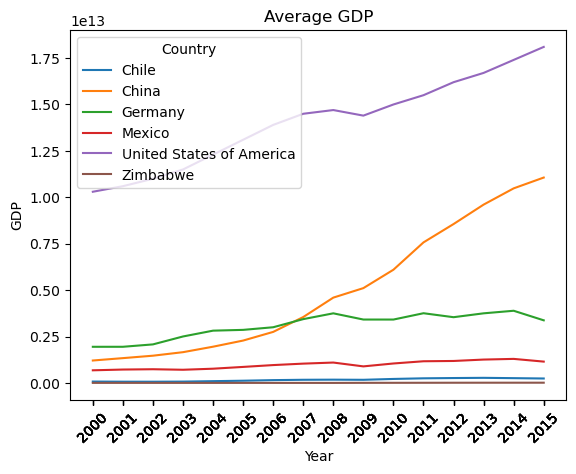

In [151]:
sns.lineplot(x='Year', y='GDP',hue='Country',data=df)
plt.title("Average GDP")
plt.xticks(df['Year'], rotation=45)
plt.show()

Germany and Chile had the 2 highest average life expectancies across the data, but they do not have the highest GDP

Let's now do rigourous testing on the countries to further understand the data

Let's also use a scatterplot to understand, visually, if any relationship exists

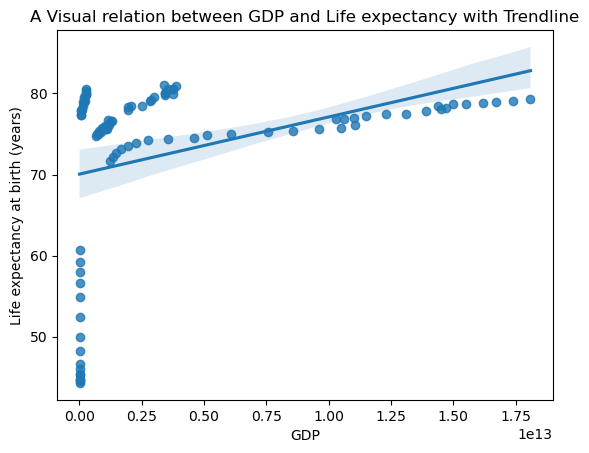

<Figure size 640x480 with 0 Axes>

In [152]:
sns.regplot(x='GDP', y='Life expectancy at birth (years)', data=df)
plt.title('A Visual relation between GDP and Life expectancy with Trendline')
plt.show()
plt.clf()

Now, let us use rigourous testing to prove that there is a correlation

In [153]:
correlation, p_pvalue = stats.pearsonr(df['GDP'],df['Life expectancy at birth (years)'])
print(f"The Pearson correlation coefficient is: {correlation}")
print(f"The P Value is: {p_pvalue}")

The Pearson correlation coefficient is: 0.343206748449156
The P Value is: 0.0006187129569469888


Weak positive relationship between GDP and Life expectancy, which is statistically significant